In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lab 3 : Working with Neural Networks

---


Total Points: **100 points**


Submission Deadline :  **12th-Apr-2024 (10:00 AM)**


---



General Instructions:
---

1. **Code Readability** is very important.
* Modularize your code by making use
of classes and functions that can be flexibly reused wherever necessary.
* Use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as required.
2. Students are expected to follow the **honor code** of the class.

Note: **For any enquiry please write to surbhi.19csz0011@iitrpr.ac.in or akanksha.22csz0001@iitrpr.ac.in**


In this lab, we will perform **clustering** and **classification** tasks.
We will consider “Ecommerce.csv” for the clustering problem, “Facial_Emotion_Recognition.zip” for CNN based multi-class classification, and “winequality.csv” for MLP formulation. All these datasets are available at following link:
https://drive.google.com/drive/folders/1dnTzyeKZrErhJVuGkUVwEaTCoR-Yf2iW?usp=drive_link




---



Section 1: MLP  **(Total points = 45)**

---


*   **Task Overview:**
Given a dataset containing 1600 entries offering information about physical and chemical properties of red wine variants.The target variable is the wine quality rating. Use this dataset to predict wine quality based on measurable factors, potentially aiding in the wine making process.

*   **Dataset Split:**
X_train, X_test, Y_train, Y_test = train_test_split(Data, Labels, test_size=0.20, random_state=42)

Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the Wine Quality (Dataset is provided as a CSV file).

**Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section.**

1. Perform an exploratory analysis on the given dataset. Print the avg, max & min values of each column. Perform data pre-processing operations like standardization and splitting (80:20) of data. **(4 points)**

2. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh activations at each layer of MLP for the user. **(13 points)**

3. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(13 points)**

4. Train your model using the “cross-entropy” loss. Mention your choices of the hyperparameters for training. Perform training with batch gradient descent and stochastic gradient descent. Plot the graph of training error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the training methods. **(2+3 = 5)**

5. Using the best training method from the above training, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001]. **(5 points)**
6. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus learning rate. Comment on your observations. **(3+2 = 5 points)**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/drive/My Drive/ML_Lab3_Dataset/winequality.csv'
df = pd.read_csv(file_path)

In [ ]:
# --------------------------------------------------------------------------------------------------------------------
# ------------------------------------------ Task 1.1: Exploratory Analysis ------------------------------------------
# --------------------------------------------------------------------------------------------------------------------

In [ ]:
# Printing minimum, maximum and average of each column
exploratory_stats = df.agg(['min', 'max', 'mean'])
exploratory_stats = exploratory_stats.T
print(exploratory_stats)

                          min        max       mean
fixed acidity         4.60000   15.90000   8.319637
volatile acidity      0.12000    1.58000   0.527821
citric acid           0.00000    1.00000   0.270976
residual sugar        0.90000   15.50000   2.538806
chlorides             0.01200    0.61100   0.087467
free sulfur dioxide   1.00000   72.00000  15.874922
total sulfur dioxide  6.00000  289.00000  46.467792
density               0.99007    1.00369   0.996747
pH                    2.74000    4.01000   3.311113
sulphates             0.33000    2.00000   0.658149
alcohol               8.40000   14.90000  10.422983
quality               3.00000    8.00000   5.636023


In [ ]:
# Function to standardize dataframe
def standardized_dataframe(df):
   return (df - df.mean()) / (5 * df.std())

In [ ]:
# Function to split training and testing data
def train_test_split(data, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(data))
    test_samples = int(len(data) * test_size)
    test_indices = indices[:test_samples]
    train_indices = indices[test_samples:]
    train_set = data.iloc[train_indices]
    test_set = data.iloc[test_indices]
    return train_set, test_set

In [ ]:
# --------------------------------------------------------------------------------------------------------------------
# ------------------------------------------ Task 1.2: Feed Forward Pass ---------------------------------------------
# --------------------------------------------------------------------------------------------------------------------

In [ ]:
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [ ]:
def activation(z, activation_type):
    if activation_type == 'tanh':
       a = tanh(z)
    else:
       a = sigmoid(z)
    return a

In [ ]:
def softmax(x):
    max_x = np.max(x, axis=1, keepdims=True)
    exp_x = np.exp(x - max_x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [ ]:
# Forward Pass
def forward(X, W1, W2, b1, b2, activation_at_hidden):
    z1 = np.dot(X, W1) + b1
    a1 = activation(z1, activation_at_hidden)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

In [ ]:
# --------------------------------------------------------------------------------------------------------------------
# ------------------------------------------ Task 1.3: Back Propogation ----------------------------------------------
# --------------------------------------------------------------------------------------------------------------------

In [ ]:
def cross_entropy(y_true, y_pred):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

In [ ]:
def d_activation(z, activation_type):
    if activation_type == 'tanh':
       return  (1 - np.power(activation(z, activation_type), 2))
    return activation(z, activation_type) * (1 - activation(z, activation_type))


In [ ]:
def backward(X, y, W1, W2, b1, b2, y_pred, a1, z1, activation_at_hidden):
  loss = cross_entropy(y, y_pred)
  d_loss_dz2 = y_pred - y
  d_loss_dW2 = np.dot(a1.T, d_loss_dz2)
  d_loss_db2 = np.sum(d_loss_dz2, axis=0)
  d_loss_da1 = np.dot(d_loss_dz2, W2.T)
  d_loss_dz1 = d_loss_da1 * d_activation(z1, activation_at_hidden)
  d_loss_dW1 = np.dot(X.T, d_loss_dz1)
  d_loss_db1 = np.sum(d_loss_dz1, axis=0)
  return d_loss_dW1, d_loss_dW2, d_loss_db1, d_loss_db2

In [ ]:
# --------------------------------------------------------------------------------------------------------------------
# ------------------------------------------ Task 1.4: Training MLP --------------------------------------------------
# --------------------------------------------------------------------------------------------------------------------

In [ ]:
def update_parameters(W1, W2, b1, b2, d_loss_dW1, d_loss_dW2, d_loss_db1, d_loss_db2, learning_rate):
    W1 -= learning_rate * d_loss_dW1
    b1 -= learning_rate * d_loss_db1
    W2 -= learning_rate * d_loss_dW2
    b2 -= learning_rate * d_loss_db2
    return W1, b1, W2, b2

In [ ]:
def predict(X_test, y_test, W1, W2, b1, b2, activation_at_hidden):
  z1, a1, z2, a2 = forward(X, W1, b1, W2, b2)
  return cross_entropy(y_test, a2)

In [ ]:
def find_accuracy(y, y_pred):
    accuracy = len(y)
    for i in range(len(y)):
        if  np.argmax(y[i]) != np.argmax(y_pred[i]):
            accuracy -= 1
    return accuracy/len(y)

In [ ]:
def train_MLP(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size=32):
    np.random.seed(1065)
    input_size = X_train.shape[1]
    W1 = np.random.randn(input_size, hidden_units)
    b1 = np.zeros((1, hidden_units))
    W2 = np.random.randn(hidden_units, num_classes)
    b2 = np.zeros((1, num_classes))
    training_losses = []
    testing_losses = []
    epochs = []

    if batch_size > len(X_train):
        batch_size = len(X_train)

    num_batches = len(X_train) // batch_size

    for epoch in range(num_epochs):
        for batch_idx in range(num_batches):
            start_idx = batch_idx * batch_size
            end_idx = (batch_idx + 1) * batch_size
            X_batch = X_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]

            z1, a1, z2, a2 = forward(X_batch, W1, W2, b1, b2, activation_at_hidden)
            training_loss = cross_entropy(y_batch, a2)

            d_loss_dW1, d_loss_dW2, d_loss_db1, d_loss_db2 = backward(X_batch, y_batch, W1, W2, b1, b2, a2, a1, z1, activation_at_hidden)
            W1, b1, W2, b2 = update_parameters(W1, W2, b1, b2, d_loss_dW1, d_loss_dW2, d_loss_db1, d_loss_db2, learning_rate)

        if epoch % 100 == 0:
            z1, a1, z2, a2 = forward(X_train, W1, W2, b1, b2, activation_at_hidden)
            training_loss = cross_entropy(y_train, a2)
            z1, a1, z2, a2 = forward(X_test, W1, W2, b1, b2, activation_at_hidden)
            testing_loss = cross_entropy(y_test, a2)
            testing_losses.append(testing_loss)
            training_losses.append(training_loss)
            epochs.append(epoch)

    return W1, b1, W2, b2, training_losses, testing_losses, epochs

In [ ]:
def one_hot_encode(y):
    unique_values = np.unique(y)
    num_classes = len(unique_values)
    encoded_data = np.zeros((len(y), num_classes))
    for i, value in enumerate(y):
        index = np.where(unique_values == value)[0][0]
        encoded_data[i, index] = 1
    return encoded_data

In [ ]:
df = standardized_dataframe(df)
train_set, test_set = train_test_split(df)
X_train = train_set.drop(columns=['quality']).values
y_train = one_hot_encode(train_set['quality'].values)
X_test = test_set.drop(columns=['quality']).values
y_test = one_hot_encode(test_set['quality'].values)

In [ ]:
def plot_training_and_test_error_with_epochs(epochs, training_losses, testing_losses, batch_size):
   plt.plot(epochs, training_losses, color='red', label = 'Training Error')
   plt.plot(epochs, testing_losses, color='green', label ='Testing Error')
   plt.xlabel('Epochs')
   plt.ylabel('Error')
   plt.title(f'Error vs Epochs (Batch size = {batch_size})')
   plt.grid(True)
   plt.ylim(0.6, 1.6)
   plt.legend()
   plt.show()

In [ ]:
# ----------- Hyperparameters for analysis --------------

hidden_units = 15
num_classes = 6
num_epochs = 10000
learning_rate = 0.001
batch_sizes = [1, 8, 64, 512, 2048]

In [ ]:
# --------------------------------------------- For tanh ---------------------------------------------

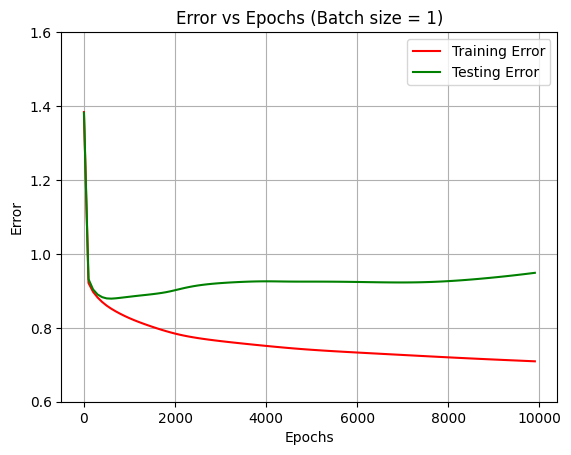

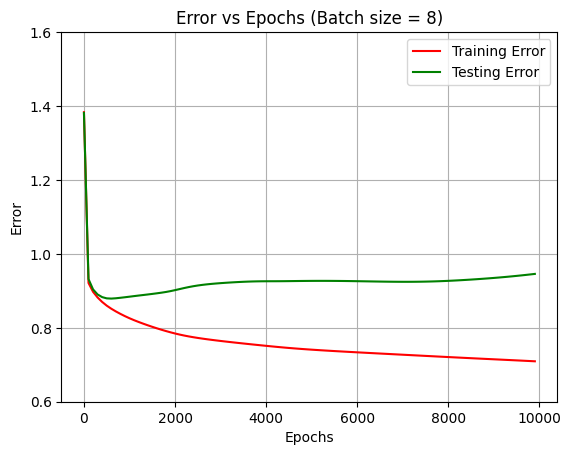

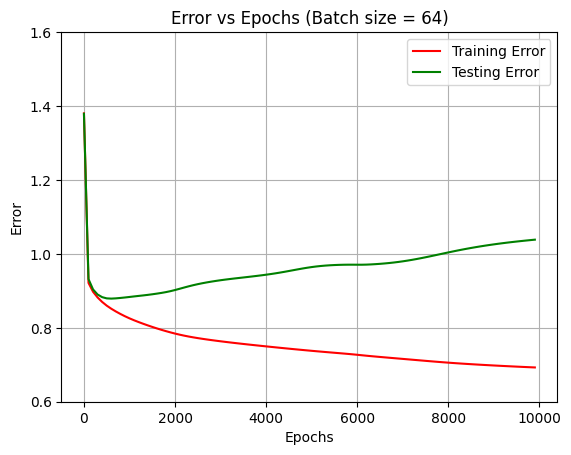

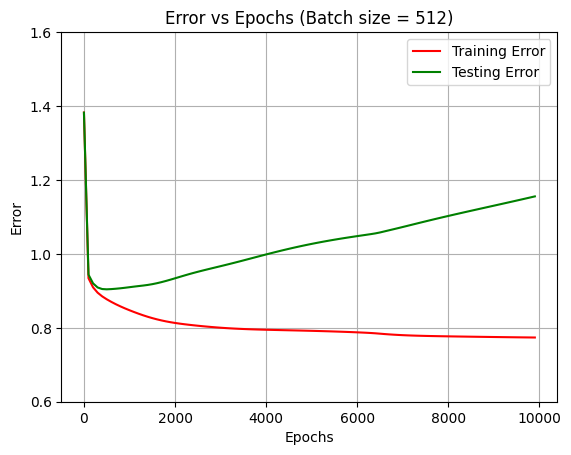

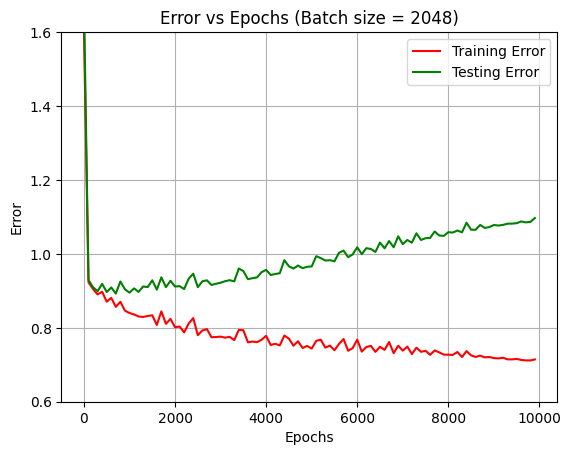

In [ ]:
activation_at_hidden = 'tanh'
for batch_size in batch_sizes:
    W1, b1, W2, b2, training_losses, testing_losses, epochs = train_MLP(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size)
    plot_training_and_test_error_with_epochs(epochs, training_losses, testing_losses, batch_size)

In [ ]:
# ------------------------------------------------ For sigmod -------------------------------------------------

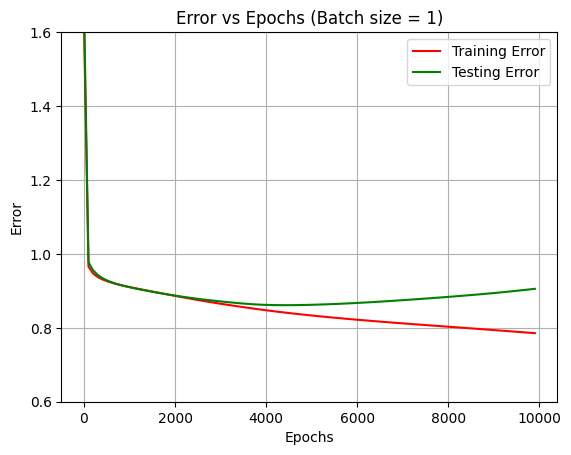

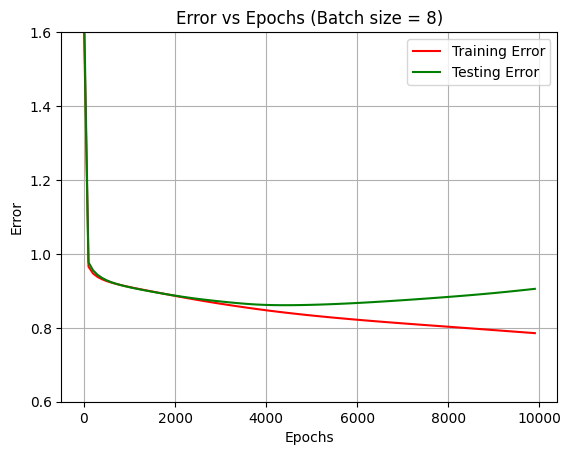

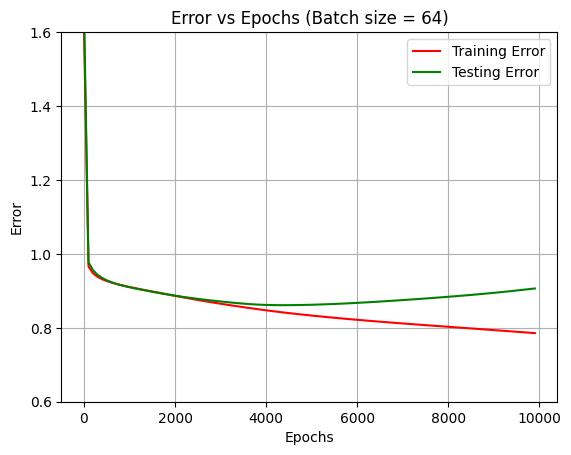

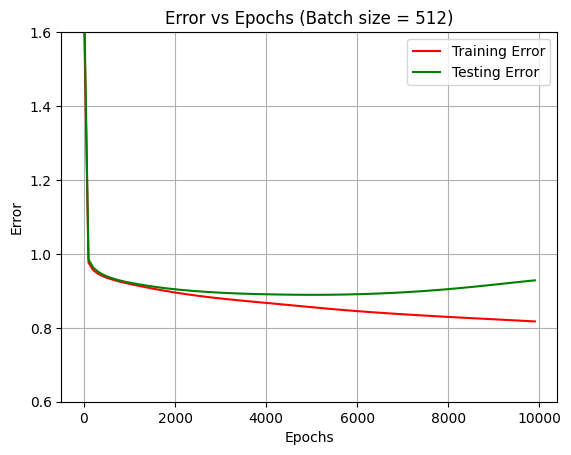

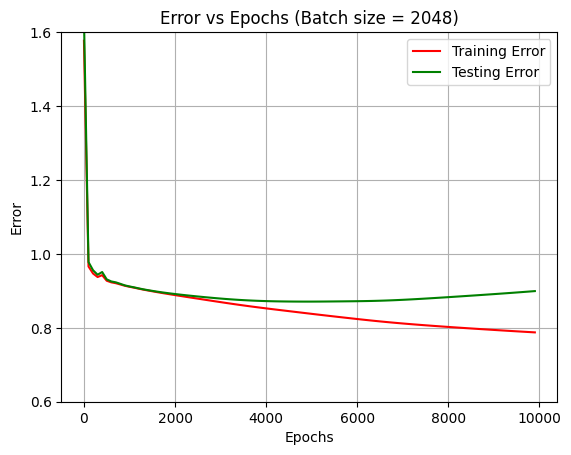

In [ ]:
activation_at_hidden = 'sigmoid'
for batch_size in batch_sizes:
    W1, b1, W2, b2, training_losses, testing_losses, epochs = train_MLP(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size)
    plot_training_and_test_error_with_epochs(epochs, training_losses, testing_losses, batch_size)

In [ ]:
# --------------------------------------------- Accuracy calculation ------------------------------------------------

In [ ]:
def plot_training_and_test_accuracy_with_batch_size(batch_sizes, training_accuracies, testing_accuracies, epochs):
   plt.plot(batch_sizes, training_accuracies, color='red', label = 'Training Accuracy')
   plt.plot(batch_sizes, testing_accuracies, color='green', label ='Testing Accuracy')
   plt.xlabel('Batch size')
   plt.ylabel('Accuracy')
   plt.title(f'Accuracy vs Batch Size (epochs = {epochs})')
   plt.grid(True)
   plt.ylim(0, 1)
   plt.legend()
   plt.show()

In [ ]:
# -- Accuracy of tanh --

In [ ]:
hidden_units = 15
num_classes = 6
num_epochs = 500
learning_rate = 0.001
activation_at_hidden = 'tanh'

In [ ]:
training_accuracies = []
testing_accuracies = []
batch_sizes = [1, 8, 64, 512, 2048]

for batch_size in batch_sizes:
    W1, b1, W2, b2, training_losses, testing_losses, epochs = train_MLP(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size)
    z1, a1, z2, a2 = forward(X_train, W1, W2, b1, b2, activation_at_hidden)
    training_accuracies.append(find_accuracy(y_train, a2))
    z1, a1, z2, a2 = forward(X_train, W1, W2, b1, b2, activation_at_hidden)
    testing_accuracies.append(find_accuracy(y_test, a2))

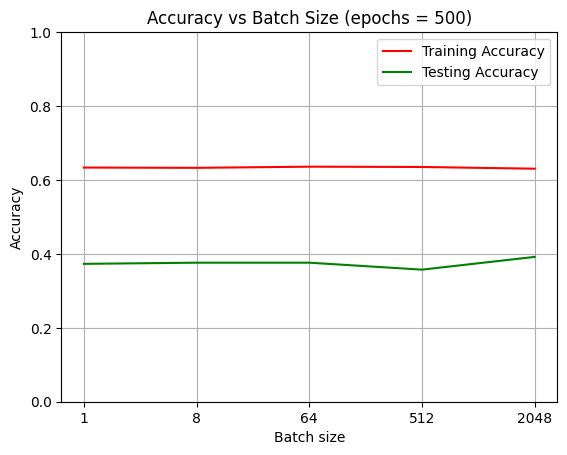

In [ ]:
batch_sizes = ['1', '8', '64', '512', '2048']
plot_training_and_test_accuracy_with_batch_size(batch_sizes, training_accuracies, testing_accuracies, num_epochs)

In [ ]:
# -- Accuracy of sigmoid --

In [ ]:
hidden_units = 15
num_classes = 6
num_epochs = 4000
learning_rate = 0.001
activation_at_hidden = 'sigmoid'

In [ ]:
training_accuracies = []
testing_accuracies = []
batch_sizes = [1, 8, 64, 512, 2048]

for batch_size in batch_sizes:
    W1, b1, W2, b2, training_losses, testing_losses, epochs = train_MLP(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size)
    z1, a1, z2, a2 = forward(X_train, W1, W2, b1, b2, activation_at_hidden)
    training_accuracies.append(find_accuracy(y_train, a2))
    z1, a1, z2, a2 = forward(X_train, W1, W2, b1, b2, activation_at_hidden)
    testing_accuracies.append(find_accuracy(y_test, a2))

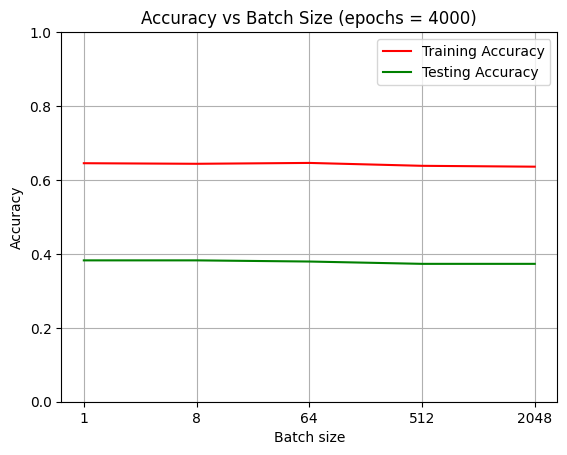

In [ ]:
batch_sizes = ['1', '8', '64', '512', '2048']
plot_training_and_test_accuracy_with_batch_size(batch_sizes, training_accuracies, testing_accuracies, num_epochs)

In [ ]:
'''
Results and Observation:

'''

'\nResults and Observation: \n\n'

In [ ]:
# --------------------------------------------------------------------------------------------------------------------
# -------------------------- Task 1.5 and 1.6: Training MLP with different learning rate -----------------------------
# --------------------------------------------------------------------------------------------------------------------

In [ ]:
def plot_training_and_test_accuracy_with_learning_rate(learning_rates, training_accuracies, testing_accuracies, epochs):
   plt.plot(learning_rates, training_accuracies, color='red', label = 'Training Accuracy')
   plt.plot(learning_rates, testing_accuracies, color='green', label ='Testing Accuracy')
   plt.xlabel('Batch size')
   plt.ylabel('Accuracy')
   plt.title(f'Accuracy vs Batch Size (epochs = {epochs})')
   plt.grid(True)
   plt.ylim(0, 1)
   plt.legend()
   plt.show()

In [ ]:
def plot_training_and_test_error_with_batch_size_and_learing_rate(training_accuracies, testing_accuracies, epochs, batch_size, learning_rate):
   plt.plot(epochs, training_accuracies, color='red', label = 'Training Accuracy')
   plt.plot(epochs, testing_accuracies, color='green', label ='Testing Accuracy')
   plt.xlabel('Epochs')
   plt.ylabel('Error')
   plt.title(f'Error vs Epochs (Batch size = {batch_size}, Learning Rate = {learning_rate})')
   plt.grid(True)
   plt.legend()
   plt.show()

In [ ]:
hidden_units = 15
num_classes = 6
num_epochs = 10000
batch_sizes = 1
activation_at_hidden = 'sigmoid'

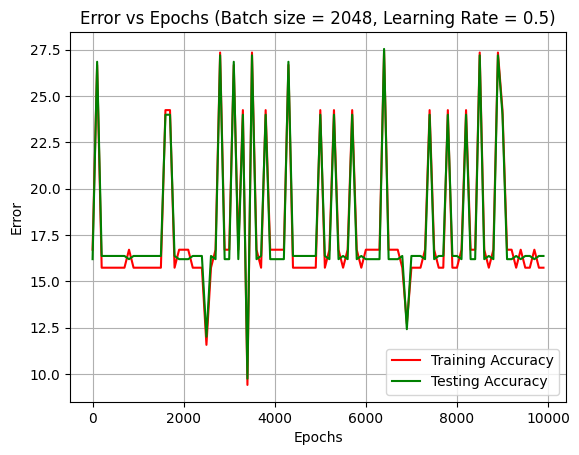

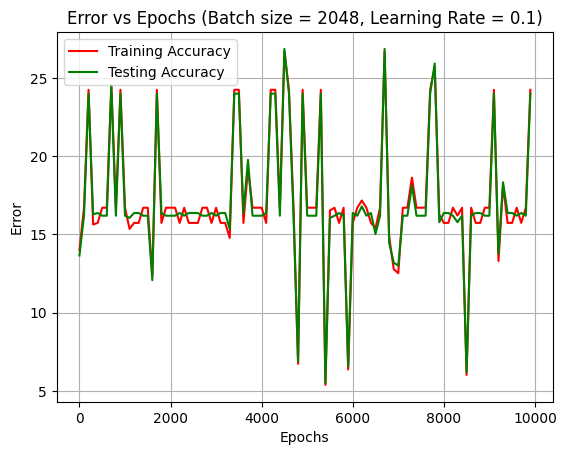

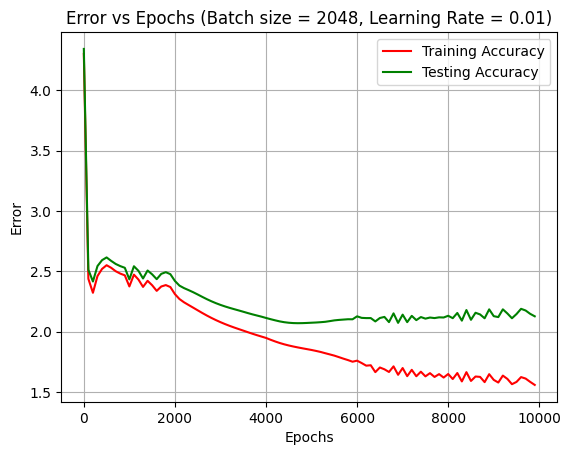

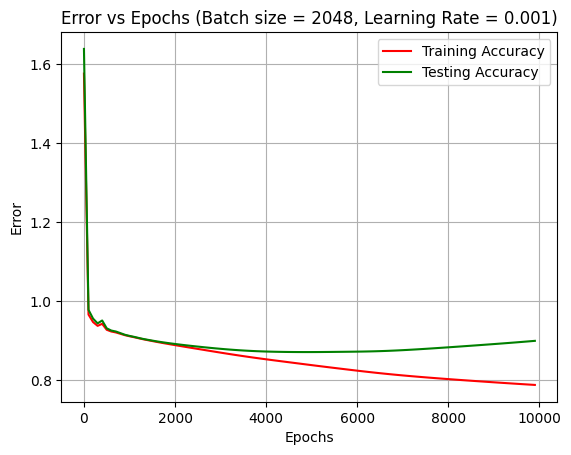

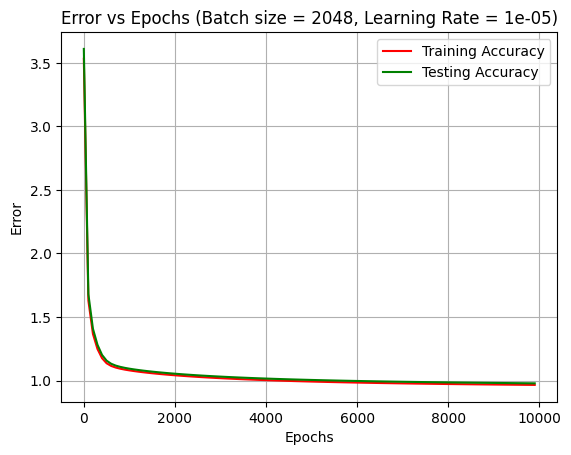

In [ ]:
training_accuracies = []
testing_accuracies = []
learning_rates = [0.5, 0.1, 0.01, 0.001, 0.00001]

for learning_rate in learning_rates:
    W1, b1, W2, b2, training_losses, testing_losses, epochs = train_MLP(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size)
    plot_training_and_test_error_with_batch_size_and_learing_rate(training_losses, testing_losses, epochs, batch_size, learning_rate)

In [ ]:
num_epochs = 5000
training_accuracies = []
testing_accuracies = []
learning_rates = [0.5, 0.1, 0.01, 0.001, 0.00001]

for learning_rate in learning_rates:
    W1, b1, W2, b2, training_losses, testing_losses, epochs = train_MLP(X_train, y_train, X_test, y_test, hidden_units, num_classes, num_epochs, learning_rate, activation_at_hidden, batch_size)
    z1, a1, z2, a2 = forward(X_train, W1, W2, b1, b2, activation_at_hidden)
    training_accuracies.append(find_accuracy(y_train, a2))
    z1, a1, z2, a2 = forward(X_train, W1, W2, b1, b2, activation_at_hidden)
    testing_accuracies.append(find_accuracy(y_test, a2))

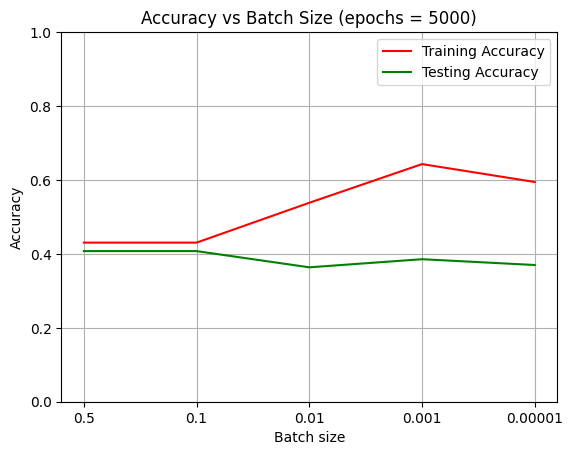

In [ ]:
learning_rates = ['0.5', '0.1', '0.01', '0.001', '0.00001']
plot_training_and_test_accuracy_with_learning_rate(learning_rates, training_accuracies, testing_accuracies, num_epochs)


---



Section 2:    Multi-class classification
 **(Total points = 40)**

---
**Description of Dataset:**

*   The dataset consists of grayscale images portraying faces with dimensions of 48x48 pixels. The images have undergone automatic alignment to ensure that each face is approximately centered, maintaining a consistent amount of space in every image.
*  The primary objective is to categorize each face based on the expressed emotion, assigning it to one of three categories: Happy (0), Sad (1), or Neutral (2). The training set encompasses 17,109 examples, while the public test set comprises 4,254 examples.


**Tasks:**

1. **Explore the Dataset:** Display three randomly selected images from each class to visually understand the dataset. Generate a distribution plot illustrating the number of images in each emotion class? Is the distribution uniform? Comment. **(5 points)**
2. **Convolution:** Implement the 2D convolution function using a kernel size of 3x3. Use the sobel kernel and display the feature map for one example from each emotion class. For using sobel kernel, you need to calculate two convolutions, one for x-direction (x) and one for y-direction (y), the feature map then can be calculated as


 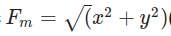

**(10 points)**

3. **Implement Sequential CNN Model** : Utilize the Keras library to implement a sequential Convolutional Neural Network (CNN) model for facial emotion classification. Adopt the following network architecture for the CNN model:


* Input layer
* Con2D with 128 neurons 3x3 kernels and ReLU activation.
* Con2D with 64 neurons 3x3 kernels and ReLU activation with batch normalization.
* Max Pooling layer with pool-size 2x2 and padding as 'valid'.
* Con2D with 16 neurons 3x3 kernels and ReLU activation and stride 2.
* Con2D with 10 neurons 3x3 kernels and ReLU activation.
* Max Pooling layer with pool-size 2x2 and padding as 'valid'.
* Batch normalization
* Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.
* Dropout of 30% ie. 0.3
* Fully Connected Dense Layer with number of classes neurons and softmax activation.

**(5 points)**

4. **Training and Compiling:** Utilize cross-entropy loss for multi-class classification and proceed to compile and train the model employing four distinct optimizers: SGD, RMSprop, Adam, and Adagrad. Generate plots illustrating the training loss for each optimizer. Provide commentary on your observations. Additionally, incorporate early stopping with parameters (min_delta=0.01, patience=2) during both the compilation and training phases of your model. **(10 points)**


**NOTE: You can try to find the best learning rate from the following: [0.001, 0.0001, 0.00001, 0.01] and take batch size to be 32 in data generators.**

5. **Activation Maps:** Generate activation maps for two selected intermediate convolutional blocks across randomly chosen 10 images, state class-specific observations. **(10 points)**


In [ ]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2

In [ ]:
common_file_path = '/content/drive/My Drive/ML_Lab3_Dataset/Facial_Emotion_Recognition/Image_dataset'
train_happy_images_file_path = common_file_path + '/train/happy'
train_sad_images_file_path = common_file_path + '/train/sad'
train_neutral_images_file_path = common_file_path + '/train/neutral'
test_happy_images_file_path = common_file_path + '/test/happy'
test_sad_images_file_path = common_file_path + '/test/sad'
test_neutral_images_file_path = common_file_path + '/test/neutral'

In [ ]:
# -------------------------------------------------------------------------------------------------------------
# ------------------------------------------ Task 2.1: Explore the dataset ------------------------------------
# -------------------------------------------------------------------------------------------------------------

In [ ]:
# Training images distribution
num_happy_training_images =  len(os.listdir(train_happy_images_file_path))
num_sad_training_images = len(os.listdir(train_sad_images_file_path))
num_neutral_training_images  = len(os.listdir(train_neutral_images_file_path))
print("Number of training images depicting happy faces:", num_happy_training_images)
print("Number of training images depicting sad faces:", num_sad_training_images)
print("Number of training images depicting neutral faces:", num_neutral_training_images)

Number of training images depicting happy faces: 7214
Number of training images depicting sad faces: 4840
Number of training images depicting neutral faces: 4965


In [ ]:
# Testing iamges distribution
num_happy_testing_images =  len(os.listdir(test_happy_images_file_path))
num_sad_testing_images = len(os.listdir(test_sad_images_file_path))
num_neutral_testing_images  = len(os.listdir(test_neutral_images_file_path))
print("Number of testing images depicting happy faces:", num_happy_testing_images)
print("Number of testing images depicting sad faces:", num_sad_testing_images)
print("Number of testing images depicting neutral faces:", num_neutral_testing_images)

Number of testing images depicting happy faces: 1774
Number of testing images depicting sad faces: 1247
Number of testing images depicting neutral faces: 1233


In [ ]:
def choose_random_from_directory(directory):
    random.seed(1065)
    files = os.listdir(directory)
    random_file = random.choice(files)
    return os.path.join(directory, random_file)

In [ ]:
def print_image(image_path):
    try:
        img = Image.open(image_path)
        display(img)
    except Exception as e:
        print("Error:", e)

Randomly choosen happy face :


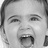

Randomly choosen sad face :


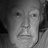

Randomly choosen neutral face :


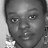

In [ ]:

print("Randomly choosen happy face :")
print_image(choose_random_from_directory(train_happy_images_file_path))

print("Randomly choosen sad face :")
print_image(choose_random_from_directory(train_sad_images_file_path))

print("Randomly choosen neutral face :")
print_image(choose_random_from_directory(train_neutral_images_file_path))

In [ ]:
def plot_distribution(emotion_classes, emotion_class_frequency):
    plt.bar(emotion_classes, emotion_class_frequency, color = 'green', width = 0.2)
    plt.xlabel("Emotion class")
    plt.ylabel("Frequency")
    plt.title("Emotion class vs Frequency")
    plt.show()

In [ ]:
emotion_classes = ['Happy', 'Sad', 'Neutral']
training_emotion_class_frequency = [num_happy_training_images, num_sad_training_images, num_neutral_training_images]
testing_emotion_class_frequency = [num_happy_testing_images, num_sad_testing_images, num_neutral_testing_images]

------------------- Training Dataset -------------------


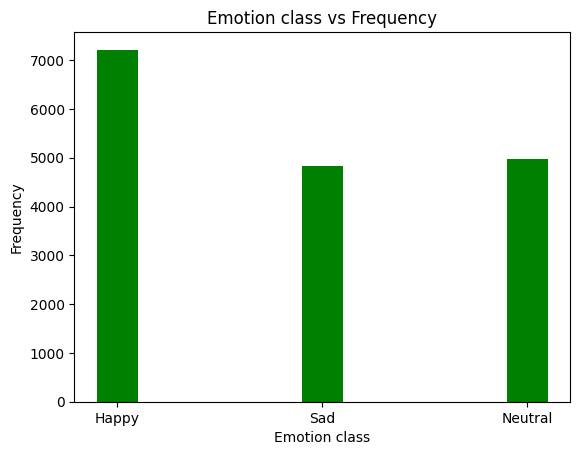

In [ ]:
print("------------------- Training Dataset -------------------")
plot_distribution(emotion_classes, training_emotion_class_frequency)

------------------- Testing Dataset -------------------


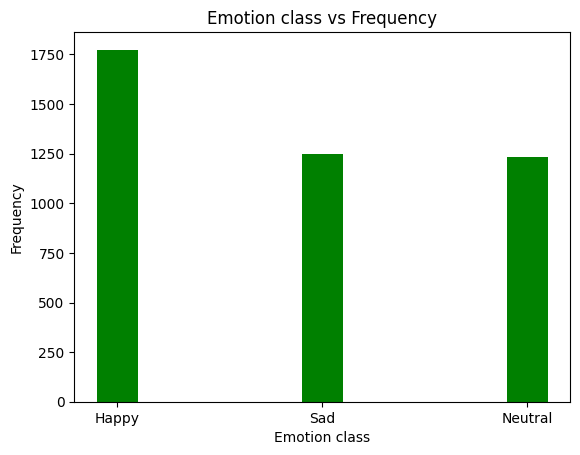

In [ ]:
print("------------------- Testing Dataset -------------------")
plot_distribution(emotion_classes, testing_emotion_class_frequency)

In [ ]:
'''
The distribution is not uniform as classes have different frequency.
'''

'\nThe distribution is not uniform as classes have different frequency.\n'

In [ ]:
# -------------------------------------------------------------------------------------------------------------
# ------------------------- Task 2.2: Plotting the feature map (using sobel kernal) ---------------------------
# -------------------------------------------------------------------------------------------------------------

In [ ]:
def convolve2d(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    feature_map = np.zeros_like(image)

    for y in range(image_height):
        for x in range(image_width):
            feature_map[y, x] = np.sum(padded_image[y:y+kernel_height, x:x+kernel_width] * kernel)

    return feature_map

In [ ]:
def sobel_filter(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

    gradient_x = convolve2d(image, sobel_x)
    gradient_y = convolve2d(image, sobel_y)

    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    return gradient_magnitude

In [ ]:
def plot_feature_map(image_path):
    image = np.array(Image.open(image_path))
    feature_map = sobel_filter(image)
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(feature_map, cmap='gray')
    plt.title('Sobel Feature Map')
    plt.axis('off')

    plt.show()

Faeture Map of randomly choosen happy face :


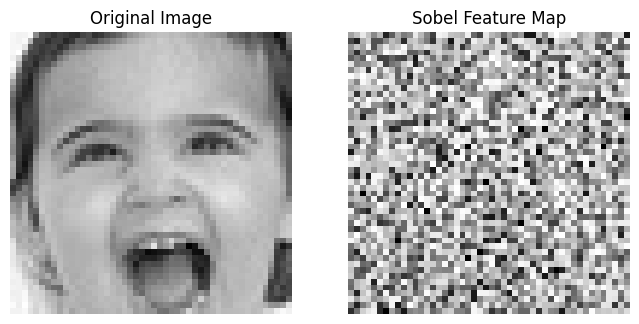




Feature map of randomly choosen sad face :


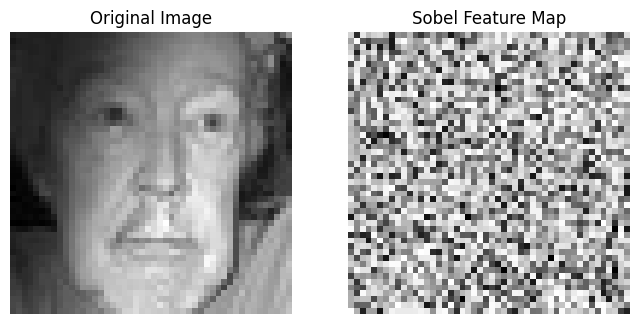




Feature map of randomly choosen neutral face :


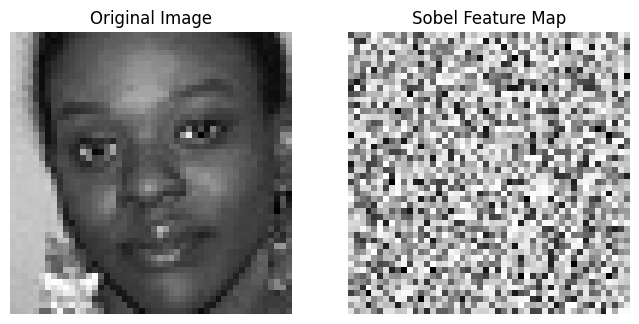

In [ ]:
print("Faeture Map of randomly choosen happy face :")
plot_feature_map(choose_random_from_directory(train_happy_images_file_path))

print("\n\n")
print("Feature map of randomly choosen sad face :")
plot_feature_map(choose_random_from_directory(train_sad_images_file_path))

print("\n\n")
print("Feature map of randomly choosen neutral face :")
plot_feature_map(choose_random_from_directory(train_neutral_images_file_path))

In [ ]:
# -------------------------------------------------------------------------------------------------------------
# ----------------------------- Task 2.3: Implementing sequential CNN model -----------------------------------
# -------------------------------------------------------------------------------------------------------------

In [ ]:
def create_sequential_cnn_model(input_shape, num_classes):
    model = Sequential()

    model.add(Conv2D(128, (3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    model.add(Conv2D(16, (3, 3), activation='relu', strides=2))
    model.add(Conv2D(10, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.05)))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    return model


---



Section 3:    Clustering  **(Total points = 15)**
New Section
---
**Description of Dataset:**

*   The dataset includes details about everything people bought from a UK-based online store over the span of eight months including productID, product descriptions and Country.
*  Objective is to explore clustering approaches.


Before implementing the clustering codes, you should perform data analysis part by performing following operations:

1.   Visualize the top countries by total sales.
2.   Visualize the product categories.
2.   Check the column data types and missing values and handle it
1.   Check the unique values in each column


**Note: you are not allowed to use sklearn’s direct functions (or any in-built functions) for clustering. Write the code at your own.**


Consider the following two features [Product_Count, 'Product_UnitPrice'] for the following tasks–
1. **K-Means Clustering:** Implement the K-Means clustering algorithm on the online retail data. Determine the optimal number of clusters using appropriate methods. Interpret and discuss the results obtained from K-Means clustering. **(5 points)**

2. **K-Medoids Clustering:** Apply the K-Medoids clustering algorithm to the same online retail data. Explain the differences between K-Means and K-Medoids algorithm results. Evaluate the effectiveness of K-Medoids in clustering the online retail data. **(5 points)**

3. **DBSCAN Clustering:** Implement the DBSCAN clustering algorithm on the online retail dataset. Discuss the parameters used for DBSCAN and their impact on the results. Compare and contrast DBSCAN with K-Means and K-Medoids in the context of online retail data. **(5 points)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/drive/My Drive/ML_Lab3_Dataset/Ecommerce.csv'
df = pd.read_csv(file_path)

In [ ]:
# Considering the following two features [Product_Count, 'Product_UnitPrice'] for the following tasks
columns = ['Product_Count', 'Product_UnitPrice']
df = df[columns]

In [ ]:
#------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------- K-Means Clustering ------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------------------

In [ ]:
def k_means(X, n_clusters = 3, max_iters = 100):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for _ in range(max_iters):

        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

In [ ]:
def compute_inertia(X, centroids, labels):
    inertia = 0

    for i in range(len(X)):
        centroid_index = labels[i]
        dist = np.linalg.norm(X[i] - centroids[centroid_index])**2
        inertia += dist

    return inertia

In [ ]:
def elbow_method(X, max_clusters):
    wcss = [0] * max_clusters

    for idx in range(20):
      seed = idx
      for k in range(1, max_clusters + 1):
          centroids, labels = k_means(X, k)
          wcss[k-1]+=compute_inertia(X, centroids, labels)

    return wcss

In [ ]:
def plot_wcss_against_k(wcss, k):
    plt.plot(k, wcss, marker='o', linestyle='-')
    plt.title('K vs wcss')
    plt.xlabel('K')
    plt.ylabel('wcss')
    plt.grid(True)
    plt.show()

In [ ]:
X = df.to_numpy()

In [ ]:
max_clusters = 10
wcss = elbow_method(X, max_clusters)

<ipython-input-6-419e9d26d283>:10: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


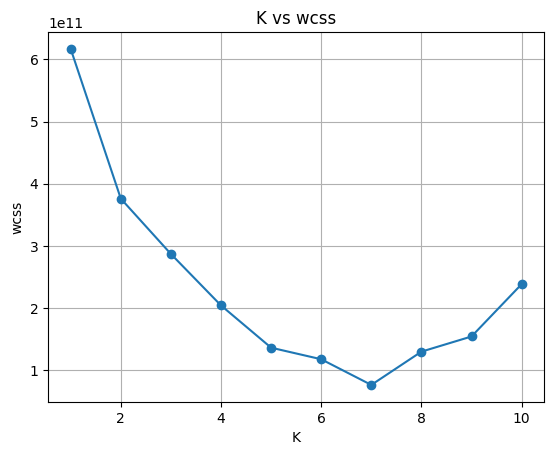

In [ ]:
k = range(1, len(wcss) + 1)
plot_wcss_against_k(wcss, k)

In [ ]:
'''
Results and Observation:

The optimal number of clusters is 5, as beyond this point, there is no notable reduction in WCSS (according to the elbow method).


'''

'\nResults and Observation from K - means clustering:\n\n'

In [ ]:
#------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------- K- Medoids Clustering ---------------------------------------------------
# -----------------------------------------------------------------------------------------------------------------------

In [ ]:
#------------------------------------------------------------------------------------------------------------------------
#----------------------------------------------- DBSCAN Clustering ------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------------------